In [168]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Import Tables

In [169]:
# Read file
df_guest = pd.read_csv("guests.csv")
df_hotel = pd.read_csv("hotels.csv")
df_pref = pd.read_csv("preferences.csv")

# Hotels

In [170]:
df_hotel.describe()

,rooms,price
count,400.000000,400.000000
mean,11.542500,177.645000
std,4.387633,73.159379
min,5.000000,50.000000
25%,8.000000,116.750000
50%,11.000000,183.000000
75%,15.000000,238.250000
max,19.000000,299.000000


## Hotel price distribution

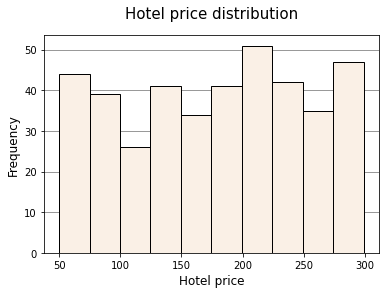

In [171]:
fig, ax1 = plt.subplots() 
y,z,_ = ax1.hist(df_hotel.price,rwidth=1,align='mid', color='linen',ec = 'black')
ax1.set_ylabel('Frequency',fontsize=12)
ax1.set_xlabel('Hotel price',fontsize=12)
plt.title('Hotel price distribution',fontsize=15,y=1.05)
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linestyle='solid')
fig.savefig('pics/hotel_price_distribution.png',bbox_inches='tight') 

Hotel prices are quite uniformly distributed between 50 and 300 Euros.   
It can be noted that there is a peak in range 200-225 Euros and that hotels in range 100-125 Euros are underrepresented. 

## Hotel rooms distribution

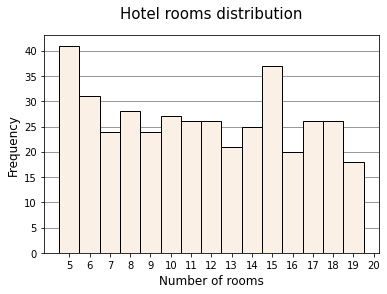

In [172]:
fig, ax1 = plt.subplots() #ax1,ax2 refer to your two pies
x = range(df_hotel.rooms.min(), df_hotel.rooms.max() + 2 )
y,z,_ = ax1.hist(df_hotel.rooms, bins=x, rwidth=1, align='left', color='linen',ec = 'black')
ax1.set_xticks(x)
ax1.set_ylabel('Frequency',fontsize=12)
ax1.set_xlabel('Number of rooms',fontsize=12)
plt.title('Hotel rooms distribution',fontsize=15,y=1.05)
ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linestyle='solid')
fig.savefig('pics/hotel_rooms_distribution.png',bbox_inches='tight') 

Number of rooms per hotel are quite uniformly distributed between 5 and 19 Euros.   
It can be noted that hotels with 5 rooms are overrepresented as well as hotels with 15 rooms

## Correlation number of hotel rooms and hotel price

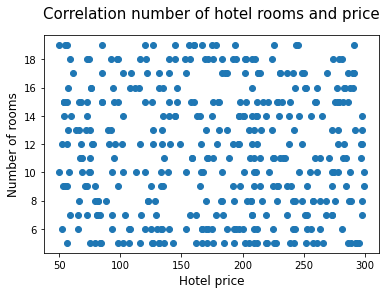

In [173]:
fig, ax1 = plt.subplots() #ax1,ax2 refer to your two pies
ax1.scatter(df_hotel.price, df_hotel.rooms)
plt.title('Correlation number of hotel rooms and price',fontsize=15,y=1.05)
ax1.set_ylabel('Number of rooms',fontsize=12)
ax1.set_xlabel('Hotel price',fontsize=12)
fig.savefig('pics/correlation_scatter1.png',bbox_inches='tight') 

There is no correlation between hotel price and number of rooms

## Classifying hotels by price 

In [174]:
quant_hotel = np.quantile(df_hotel.price, [0, 0.33, 0.66, 1])
quant_hotel

array([ 50., 135., 214., 299.])

In [175]:
df_hotel["cut_by_price"] = pd.cut(df_hotel.price, quant_hotel, include_lowest=True, labels=["cheap", "normal", "expensive"])

df_hotel.head()

,hotel,rooms,price,cut_by_price
0,hotel_1,13,273,expensive
1,hotel_2,18,92,cheap
2,hotel_3,12,141,normal
3,hotel_4,18,157,normal
4,hotel_5,7,298,expensive


(array([130., 132., 138.]),
 array([ 50., 135., 214., 299.]),
 <BarContainer object of 3 artists>)

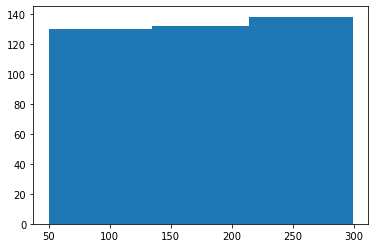

In [176]:
plt.hist(df_hotel.price, bins=quant_hotel)

In [177]:
df_hotel.pivot_table(index='cut_by_price', values='hotel', aggfunc='count')

,hotel
cut_by_price,
cheap,133
normal,132
expensive,135


Hotels have been divided in 3 categories: "cheap", "normal" and "expensive". 

In [178]:
df_hotel.head()

,hotel,rooms,price,cut_by_price
0,hotel_1,13,273,expensive
1,hotel_2,18,92,cheap
2,hotel_3,12,141,normal
3,hotel_4,18,157,normal
4,hotel_5,7,298,expensive


## Number of hotel rooms for each hotel category

In [179]:
df_hotel.pivot_table(index='cut_by_price', values="rooms", aggfunc='mean')

,rooms
cut_by_price,
cheap,11.443609
normal,11.901515
expensive,11.288889


As stated before, there is no correlation between hotel price (or price category) and number of rooms

In [180]:
df_pref = df_pref.merge(df_hotel, on='hotel')

df_pref.head()

,guest,hotel,priority,rooms,price,cut_by_price
0,guest_1,hotel_168,1,13,298,expensive
1,guest_16,hotel_168,3,13,298,expensive
2,guest_31,hotel_168,29,13,298,expensive
3,guest_51,hotel_168,3,13,298,expensive
4,guest_58,hotel_168,16,13,298,expensive


## Number of preferences per guest

In [181]:
grouped = df_pref.groupby("guest", as_index=False)["hotel"].count()

In [182]:
grouped

,guest,hotel
0,guest_1,18
1,guest_10,27
2,guest_100,36
3,guest_1000,47
4,guest_1001,41
...,...,...
3995,guest_995,7
3996,guest_996,2
3997,guest_997,44
3998,guest_998,25


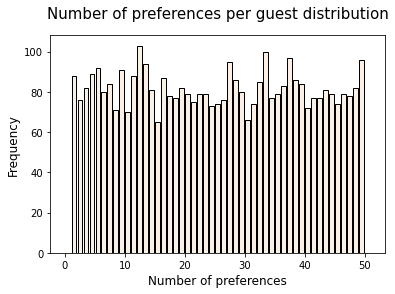

In [215]:
fig, ax1 = plt.subplots() 
x = range (0,52)
ax1.hist(grouped.hotel,bins = x, rwidth=0.8,align='mid', color='linen',ec = 'black')
plt.title('Number of preferences per guest distribution',fontsize=15,y=1.05)
ax1.set_ylabel('Frequency',fontsize=12)
ax1.set_xlabel('Number of preferences',fontsize=12)
fig.savefig('pics/Number_of_pref_per_guest.png',bbox_inches='tight') 

The distribution of number of preferences per guest is quite uniform.

In [184]:
quant_pref = np.quantile(grouped.hotel, [0, 0.33, 0.66, 1])
grouped["cut_by_pref"] = pd.cut(grouped.hotel, quant_pref, include_lowest=True, labels=["low", "medium", "top"])

In [185]:
quant_pref

array([ 1., 16., 33., 49.])

In [186]:
grouped

,guest,hotel,cut_by_pref
0,guest_1,18,medium
1,guest_10,27,medium
2,guest_100,36,top
3,guest_1000,47,top
4,guest_1001,41,top
...,...,...,...
3995,guest_995,7,low
3996,guest_996,2,low
3997,guest_997,44,top
3998,guest_998,25,medium


In [187]:
grouped

,guest,hotel,cut_by_pref
0,guest_1,18,medium
1,guest_10,27,medium
2,guest_100,36,top
3,guest_1000,47,top
4,guest_1001,41,top
...,...,...,...
3995,guest_995,7,low
3996,guest_996,2,low
3997,guest_997,44,top
3998,guest_998,25,medium


In [188]:
df_pref = df_pref.merge(grouped[["guest", "cut_by_pref"]], on='guest')

In [189]:
df_pref.pivot_table(index='guest', aggfunc='count', values='hotel').describe()

,hotel
count,4000.000000
mean,24.883250
std,14.232859
min,1.000000
25%,12.000000
50%,25.000000
75%,37.000000
max,49.000000


In [190]:
df_pref.head()

,guest,hotel,priority,rooms,price,cut_by_price,cut_by_pref
0,guest_1,hotel_168,1,13,298,expensive,medium
1,guest_1,hotel_207,2,8,128,cheap,medium
2,guest_1,hotel_222,3,17,231,expensive,medium
3,guest_1,hotel_124,4,10,255,expensive,medium
4,guest_1,hotel_223,5,17,291,expensive,medium


In [191]:
df_pref.groupby('guest', as_index=False)['priority'].quantile([.33, .66, 1], 'lower').reset_index().drop(columns=["level_0"]).rename(columns={'level_1': "percentile", 'priority': 'priority_cutoff'})

,percentile,guest,priority_cutoff
0,0.33,guest_1,6
1,0.66,guest_1,12
2,1.00,guest_1,18
3,0.33,guest_10,9
4,0.66,guest_10,18
...,...,...,...
11995,0.66,guest_998,16
11996,1.00,guest_998,25
11997,0.33,guest_999,1
11998,0.66,guest_999,2


In [192]:
guest_percentile = df_pref.groupby('guest', as_index=False)['priority'].quantile([.33, .66, 1], 'lower').reset_index().drop(columns=["level_0"]).rename(columns={'level_1': "percentile", 'priority': 'priority_cutoff'})

In [193]:
df_pref[df_pref.guest=="guest_3671"]

,guest,hotel,priority,rooms,price,cut_by_price,cut_by_pref
99532,guest_3671,hotel_356,1,18,208,normal,low


In [194]:
guest_percentile[guest_percentile.guest=="guest_3671"]

,percentile,guest,priority_cutoff
8907,0.33,guest_3671,1
8908,0.66,guest_3671,1
8909,1.00,guest_3671,1


In [195]:
guest_percentile = guest_percentile.groupby(["guest", "priority_cutoff"], as_index=False).min()

In [196]:
guest_percentile = guest_percentile.replace({"percentile": {0.33: "top", 0.66:"medium", 1:"low"}})

In [197]:
guest_percentile.head()

,guest,priority_cutoff,percentile
0,guest_1,6,top
1,guest_1,12,medium
2,guest_1,18,low
3,guest_10,9,top
4,guest_10,18,medium


In [198]:
guest_percentile.tail()

,guest,priority_cutoff,percentile
11743,guest_998,16,medium
11744,guest_998,25,low
11745,guest_999,1,top
11746,guest_999,2,medium
11747,guest_999,3,low


In [199]:
df_pref_2 = df_pref.merge(guest_percentile, on='guest')

In [200]:
df_pref_2 = df_pref_2[df_pref_2.priority <= df_pref_2.priority_cutoff]

In [201]:
df_pref_2 = df_pref_2.sort_values(by=['guest', 'priority', 'priority_cutoff'])

In [202]:
df_pref_3 = df_pref_2.drop_duplicates(subset=['guest', 'priority'], keep='first')

## Distributions of preferences according to hotel price and given priority

In the following, hotels have been divided in 3 price categories: "cheap", "normal", and "expensive".   
In addition to that, every preference given by each guest has been classified as "top" if it is among the first priorities, "low" if it is among the lower priorities and the remainings have been classified as "medium". 

In [203]:
df_pref_3.pivot_table(index=['percentile'], columns='cut_by_price', values='hotel', aggfunc='count')

cut_by_price,cheap,normal,expensive
percentile,,,
low,11563,11207,11687
medium,10586,10464,10802
top,10903,11028,11293


To better understand the table above, the value in the first row and first column is the number of preferences with low priority given for "cheap" hotels.

In [204]:
df_pivot = df_pref_3.pivot_table(index=['percentile'], columns='cut_by_price', values='hotel', aggfunc='count')

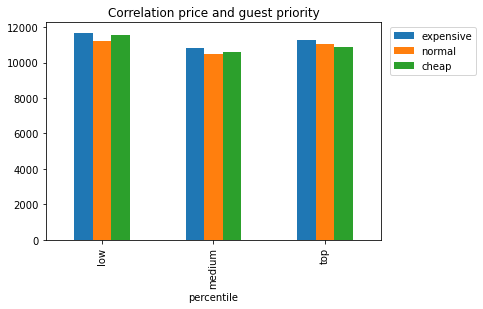

In [205]:
df_pivot.plot( y= ['expensive','normal','cheap'], kind = 'bar', title='Correlation price and guest priority')
plt.legend(loc = 'best',bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))
fig.savefig('pics/correlation_price_and_guest_priority.png',bbox_inches='tight') 

In the plot, the correlation between hotel price and hotel priority is shown.  
Guests make their choices regardless of the price.

In [206]:
df_pref.head()

,guest,hotel,priority,rooms,price,cut_by_price,cut_by_pref
0,guest_1,hotel_168,1,13,298,expensive,medium
1,guest_1,hotel_207,2,8,128,cheap,medium
2,guest_1,hotel_222,3,17,231,expensive,medium
3,guest_1,hotel_124,4,10,255,expensive,medium
4,guest_1,hotel_223,5,17,291,expensive,medium


In [207]:
df_pref.groupby("hotel", as_index=False)['priority'].count().sort_values('priority', ascending=False)

,hotel,priority
153,hotel_237,298
197,hotel_277,296
95,hotel_185,284
307,hotel_376,283
41,hotel_136,280
...,...,...
227,hotel_303,215
96,hotel_186,209
126,hotel_212,205
328,hotel_395,204


In [208]:
df_pref_3.pivot_table(index="hotel", columns='percentile', aggfunc='count', values='guest').sort_values(by=["top"], ascending=False)

percentile,low,medium,top
hotel,,,
hotel_277,82,102,112
hotel_43,90,77,108
hotel_393,82,79,106
hotel_96,80,79,104
hotel_177,79,68,103
...,...,...,...
hotel_201,99,76,64
hotel_150,82,76,63
hotel_395,74,67,63


In [209]:
df_pref

,guest,hotel,priority,rooms,price,cut_by_price,cut_by_pref
0,guest_1,hotel_168,1,13,298,expensive,medium
1,guest_1,hotel_207,2,8,128,cheap,medium
2,guest_1,hotel_222,3,17,231,expensive,medium
3,guest_1,hotel_124,4,10,255,expensive,medium
4,guest_1,hotel_223,5,17,291,expensive,medium
...,...,...,...,...,...,...,...
99528,guest_3925,hotel_356,2,18,208,normal,low
99529,guest_1197,hotel_61,1,7,157,normal,low
99530,guest_561,hotel_71,1,14,175,normal,low
99531,guest_3593,hotel_71,1,14,175,normal,low


In [210]:
df_hotel.rooms.sum()

4617

In [211]:
len(df_guest)

4000